In [2]:
# Imports
library("ggplot2")
library("tidyverse")

In [3]:
# Parameters
set.seed(1584)
ns <- c(30, 50, 100, 200, 300, 500, 1000)
k <- 2500
p <- 0.6
gamma <- 0.9
z <- qnorm((1 + gamma) / 2)

In [4]:
# Função para calcular a diferença entre os comprimentos dos intervalos de confiança
diff_ci_lengths <- function(n, k, p, z) {
  diffs <- numeric(k)
  
  for (i in 1:k) {
    sample <- rbinom(n, 1, p)
    sample_mean <- mean(sample)
    
    # Método 1
    a <- 1
    b <- -2 * sample_mean
    c <- sample_mean^2 - z^2 * (sample_mean * (1 - sample_mean) / n)
    roots <- sort(Re(polyroot(c(a, b, c))))
    ci_length_1 <- roots[2] - roots[1]
    
    # Método 2
    ci_length_2 <- 2 * z * sqrt(sample_mean * (1 - sample_mean) / n)
    
    # Diferença entre os comprimentos dos intervalos de confiança
    diffs[i] <- ci_length_2 - ci_length_1
  }
  
  return(mean(diffs))
}

In [5]:
# Calcular as diferenças médias
results <- data.frame(n = integer(), mean_diff = numeric())

for (n in ns) {
  mean_diff <- diff_ci_lengths(n, k, p, z)
  results <- rbind(results, data.frame(n = n, mean_diff = mean_diff))
}
results

n,mean_diff
<dbl>,<dbl>
30,-0.66174539
50,-0.45813004
100,-0.30602153
200,-0.20932442
300,-0.16930927
500,-0.12981433
1000,-0.09111609


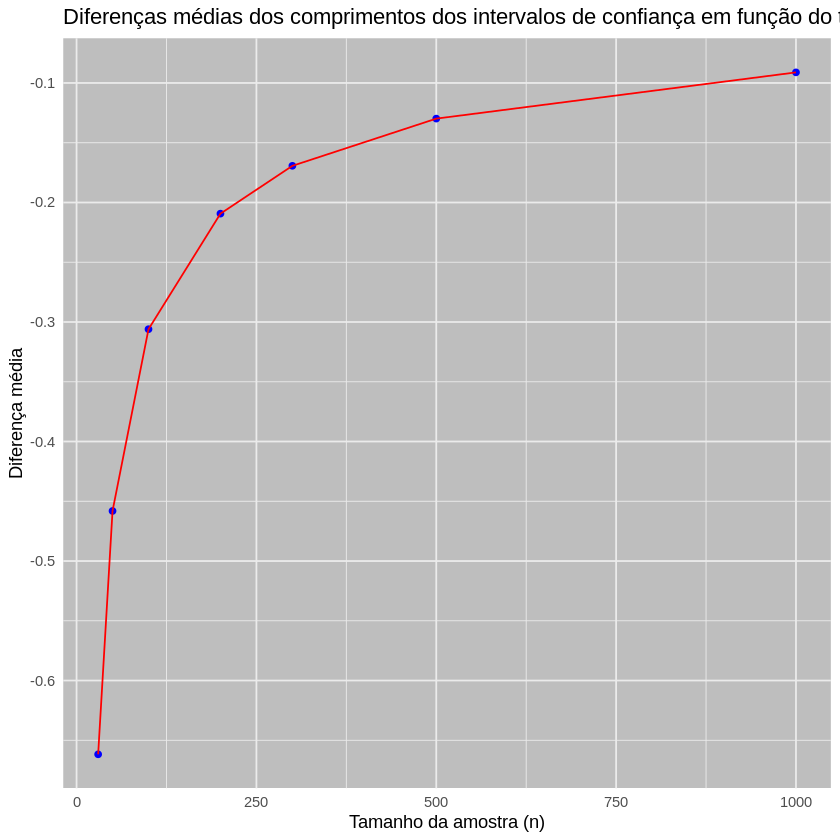

In [13]:
# Gráfico das diferenças médias
ggplot(results, aes(x = n, y = mean_diff)) +
  geom_point(color = "blue") +
  geom_line(color = "red") +
  labs(title = "Diferenças médias dos comprimentos dos intervalos de confiança em função do tamanho da amostra",
       x = "Tamanho da amostra (n)", y = "Diferença média") +
  theme_minimal() + 
  theme(panel.background = element_rect(fill = "gray", colour = NA))